In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Index

In [2]:
# Read the datasets into pandas DataFrames
df_21_22 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/97524896-b976-4ed1-a26b-70bdc8248832/download/2021-22-data-sa-crime-q1-q4.csv', index_col=0)
df_20_21 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/e0b8d120-65e3-44e6-9e2e-aeb7aec59114/download/2020-21_data_sa_crime.csv', index_col=0)
df_19_20 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/590083cd-be2f-4a6c-871e-0ec4c717717b/download/2019-20-fullyr-data_sa_crime.csv', index_col=0)
df_18_19 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/809b11dd-9944-4406-a0c4-af6a5b332177/download/2018-19-data_sa_crime.csv', index_col=0)
df_17_18 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/bf604730-9ec8-44dd-88a3-f024b387e0e4/download/2017-18-data_sa_crime.csv', index_col=0)
df_16_17 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/9eb63b08-c300-49c5-b6ef-ecb0945008b5/download/2016-17-data_sa_crime.csv', index_col=0)
df_15_16 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/19beeceb-a870-4424-b533-43c774bcb03e/download/2015-16-data_sa_crime.csv', index_col=0)
df_14_15 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/49ff5a8b-6e68-4f53-861a-085055999fcf/download/2014-15-data_sa_crime.csv', index_col=0)
df_13_14 = pd.read_csv('https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/e4a20c4d-7462-4ce2-95c9-b288f5634f62/download/2013-14-data_sa_crime.csv', index_col=0)


In [3]:
# Concatenate all DataFrames into a single DataFrame
df_combined = pd.concat([df_21_22, df_20_21, df_19_20, df_18_19, df_17_18, df_16_17, df_15_16, df_14_15, df_13_14])

In [4]:
# Calculate the total crime count for each suburb
suburb_crime_counts = df_combined['Suburb - Incident'].value_counts()

In [5]:
# Get the suburb with the highest crime count
suburb_with_highest_crime = suburb_crime_counts.idxmax()

In [8]:
suburb_crime_counts

ADELAIDE         25850
MORPHETT VALE    11273
MURRAY BRIDGE    10521
MOUNT GAMBIER    10372
PORT AUGUSTA     10074
                 ...  
REDFERN              1
BARATTA              1
NORTH LAMBTON        1
NERANG               1
RIVERGLEN            1
Name: Suburb - Incident, Length: 1969, dtype: int64

In [11]:
Index(['Suburb - Incident', 'Postcode - Incident',
       'Offence Level 1 Description', 'Offence Level 2 Description',
       'Offence Level 3 Description', 'Offence count'],
      dtype='object')

Index(['Suburb - Incident', 'Postcode - Incident',
       'Offence Level 1 Description', 'Offence Level 2 Description',
       'Offence Level 3 Description', 'Offence count'],
      dtype='object')

In [21]:
print("Suburb with the highest crime:", suburb_with_highest_crime)


Suburb with the highest crime: ADELAIDE


In [13]:
df_5000 = df_combined[df_combined['Postcode - Incident'] == "5000"]

In [14]:
df_5000_ofc = df_5000[df_5000['Offence Level 1 Description'] == "OFFENCES AGAINST THE PERSON"]

In [16]:
df_5000_ofc_grouped = df_5000_ofc.groupby(['Offence Level 3 Description']).agg({'Offence count': 'sum'}).reset_index()

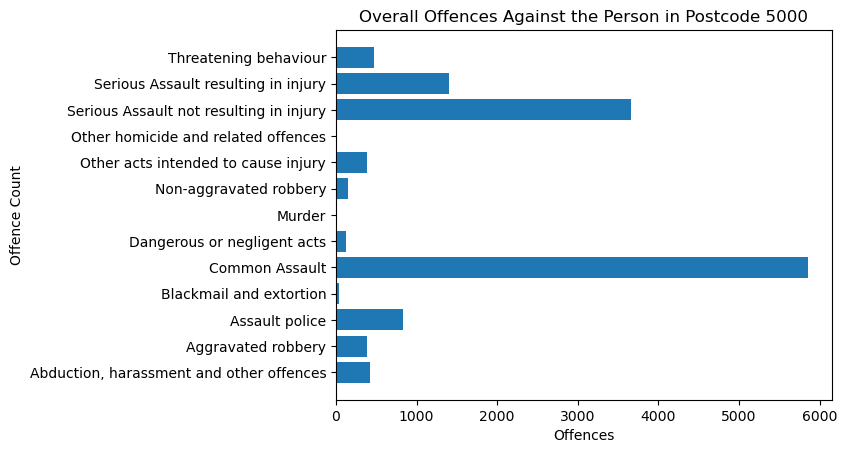

In [19]:
#Create plot for total crimes yoy
#plot
plt.barh(df_5000_ofc_grouped['Offence Level 3 Description'], df_5000_ofc_grouped['Offence count'])
#Details
plt.xlabel('Offences')
plt.ylabel('Offence Count')
plt.title(f'Overall Offences Against the Person in Postcode 5000')
#Show the plot
plt.show()

In [30]:
# Select the top 10 suburbs with the highest crime counts
top_suburbs = suburb_crime_counts.head(10)

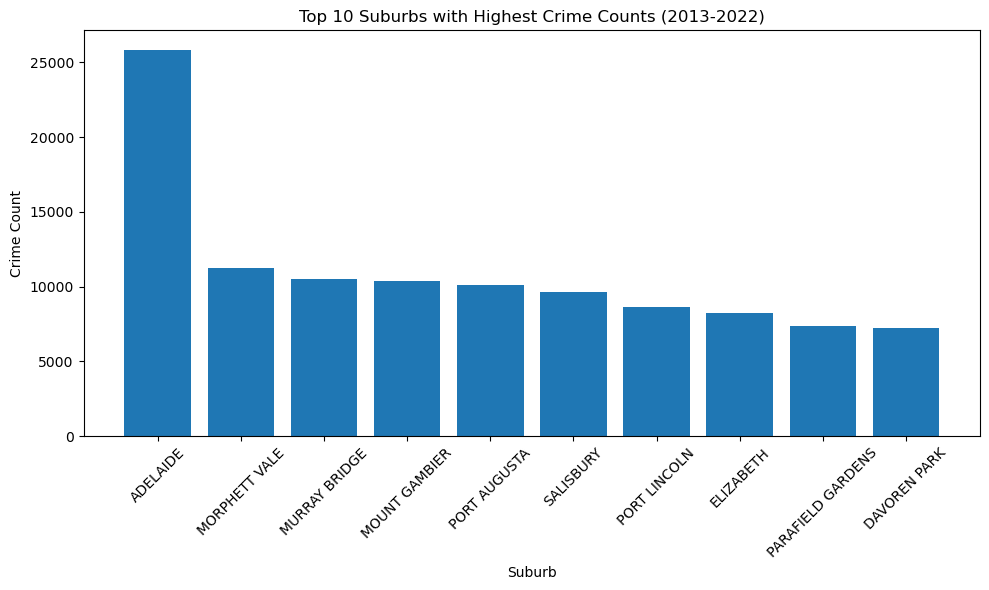

In [31]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_suburbs.index, top_suburbs.values)
plt.xticks(rotation=45)
plt.xlabel('Suburb')
plt.ylabel('Crime Count')
plt.title('Top 10 Suburbs with Highest Crime Counts (2013-2022)')
plt.tight_layout()
plt.show()

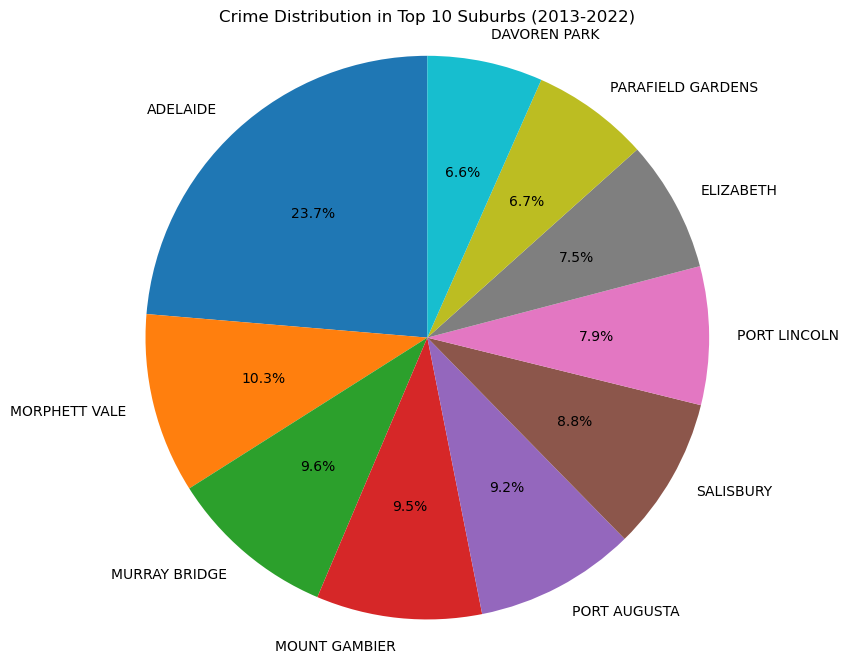

In [32]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_suburbs.values, labels=top_suburbs.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Crime Distribution in Top 10 Suburbs (2013-2022)')
plt.show()